# Week 9 Quiz

## [Chenxi Jiang] - [cj2706]

### Due Tues. Nov 8th, 11:59pm

In this quiz we'll practice scaling data and using PCA for dimensionality reduction.

### Instructions

Replace the Name and UNI in cell above and the notebook filename

Replace all '____' below using the instructions provided.

When completed, 
 1. make sure you've replaced Name and UNI in the first cell and filename
 2. Kernel -> Restart & Run All to run all cells in order 
 3. Print Preview -> Print (Landscape Layout) -> Save to pdf 
 4. post pdf to GradeScope

### Load Standard Libraries

In [1]:
# Import numpy, pandas, matplotlib.pyplot and seaborn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set matplotlib to display inline
%matplotlib inline

### Load the Dataset

In [2]:
# Import load_breast_cancer from sklearn.datasets
from sklearn.datasets import load_breast_cancer

# Load the breast cancer dataset using the load_breast_cancer() function.
# Store in the variable 'cancer'.
cancer = load_breast_cancer()

# Create a new dataframe X with values from cancer.data (which is stored as a numpy array)
#    and with columns named using cancer.feature_names (also a numpy array)
X = pd.DataFrame(cancer.data,columns=cancer.feature_names)

# For this quiz, only keep the first 10 features/columns
# Store the result back into X
X = X.iloc[:,:10]

# Assert that the shape of the dataframe is (569,10): 569 rows, 10 columns
assert X.shape == (569,10)

### Calculate Summary Stats

In [3]:
# The distribution of features in this dataset vary quite a bit, affecting PCA performance.
# To get a sense of the difference, display the mean and standard deviation of each feature.
# Use the .agg() function, which takes a list of strings describing the functions to apply.
# Call .agg() on X
#   with the function names 'mean' and 'std' 
#   transpose the dataframe using .T or .transpose()
#   and round to a precision of 2
X.agg(['mean','std']).T.round(2)

,mean,std
mean radius,14.13,3.52
mean texture,19.29,4.30
mean perimeter,91.97,24.30
mean area,654.89,351.91
mean smoothness,0.10,0.01
mean compactness,0.10,0.05
mean concavity,0.09,0.08
mean concave points,0.05,0.04
mean symmetry,0.18,0.03
mean fractal dimension,0.06,0.01


###  Standardize the Data

In [4]:
# Standardize the data to mean 0, standard deviation of 1 using sklearn StandardScaler

#Import StandardScaler from sklearn
from sklearn.preprocessing import StandardScaler

# To standardize X use StandardScaler with default settings
#  do a fit_transform() on X
#  store in X_zscore
ss = StandardScaler()
X_zscore = ss.fit_transform(X)

# Add feature names by creating a new DataFrame
#  containing X_zscore
#  with the same column names as the original dataframe X
#  store back into X_zscore
X_zscore = pd.DataFrame(X_zscore,columns = X.columns)

# assert that the mean is near 0 and standard deviation is near 1 for all standardized features
assert X_zscore.mean().round(2).eq(0).all() and X_zscore.std().round(2).eq(1).all()

# To visually confirm that all features have been standardized:
# Call .agg() on X_zscore
#   with the function names 'mean' and 'std' 
#   transpose the dataframe using .T or .transpose()
#   and round to a precision of 2
X_zscore.agg(['mean','std']).T.round(2)

,mean,std
mean radius,-0.0,1.0
mean texture,-0.0,1.0
mean perimeter,-0.0,1.0
mean area,-0.0,1.0
mean smoothness,0.0,1.0
mean compactness,-0.0,1.0
mean concavity,-0.0,1.0
mean concave points,0.0,1.0
mean symmetry,-0.0,1.0
mean fractal dimension,-0.0,1.0


### Show Variance Described by PCA

<AxesSubplot: xlabel='component', ylabel='cumulative explained variance'>

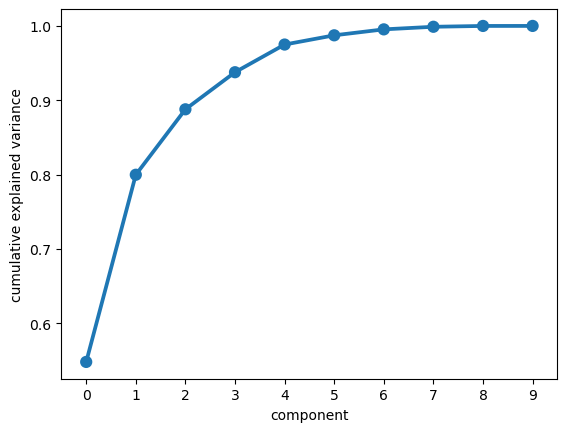

In [5]:
# Import PCA from sklearn.
from sklearn.decomposition import PCA

# Fit a PCA model to X_zscore using PCA() with default parameters
#   and store in pca
pca = PCA().fit(X_zscore)

# Create a new DataFrame with 2 columns:
#   "component" with values 0 to the number of components in pca
#   "cumulative explained variance" with the .cumsum() of the explained_variance_ratio_ in pca
#   store in df_var
cumulative_explained_variance = pca.explained_variance_ratio_.cumsum()
data = {"component":range(pca.n_components_),
        "cumulative explained variance":cumulative_explained_variance}

df_var = pd.DataFrame(data, columns=['component','cumulative explained variance'])


# Use sns.pointplot() to plot the data from df_var with
#   "component" on the x-axis
#   "cumulative explained variance" on the y-axis
sns.pointplot(x = 'component', y = 'cumulative explained variance', data = df_var)

# Note that over 55% of the variance is explained by the first component
# Over 80% by the first 2 components
# Over 90% by the first 4 components

## Transform Dataset using First 2 Components

In [6]:
# Fit and transform X_zscore using a new PCA model with n_components=2
# Store the transformed dataset in X_pca
pca2 = PCA(n_components = 2)
X_pca = pca2.fit_transform(X_zscore)

# Add feature names by creating a new DataFrame
#  containing X_pca
#  with the column names ['component0','component1']
#  store back into X_pca

data1 = {"component0": X_pca[:,0],
        "component1":X_pca[:,1]}
X_pca = pd.DataFrame(data1, columns=['component0','component1'])

# # # Assert that the pca representation has the same number of rows (569) but now 2 columns
# assert X_pca.shape == (569,2)

### Plot the Reduced Representation

Text(0.5, 1.0, 'First 2 Components Colored by Class')

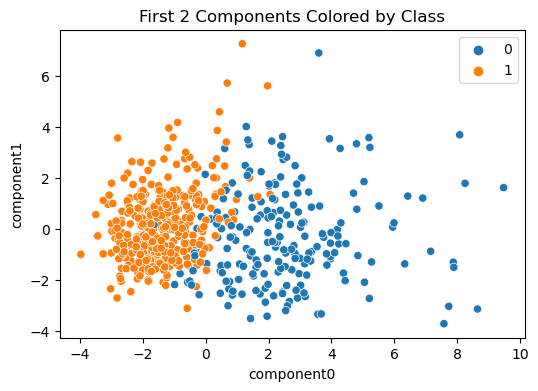

In [7]:
# Using seaborn, create a scatterplot of the data in X_pca
#  with component0 on the x-axis
#  and component1 on the y-axis
#  Color the points by their class assignment by setting hue=cancer.target
#  Capture the returned axis in ax
fig,ax = plt.subplots(1,1,figsize=(6,4))
sns.scatterplot(x = 'component0', y = 'component1', hue = cancer.target, data = X_pca, ax=ax )

# Set the title to 'First 2 Components Colored by Class' using ax
ax.set_title('First 2 Components Colored by Class')

# Note that we haven't used the cancer.target information to generate the pca representation.
# We're coloring by cancer.target here to demonstrate that under this transformation
#   a linear model will do a decent job of separating the classes